In [8]:
#comparing epsilons
#ref: https://deeplearningcourses.com/c/artificial-intelligence-reinforcement-learning-in-python
#     https://www.udemy.com/artificial-intelligence-reinforcement-learning-in-python

In [25]:
from __future__ import print_function, division # Note: update your version of future
from builtins import range
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [26]:
class Bandit:
 def __init__(self, m, upper_limit):
    self.m = m
    self.mean = upper_limit #mean initialized as upper_limit
    self.N = 1 

 def pull(self):
    return np.random.randn() + self.m # randn : return a sample (or samples) from “standard normal” distribution.

 def update(self, x):
        self.N = self.N + 1
        self.mean = (1 - 1.0/self.N)*self.mean + 1.0/self.N*x

In [27]:
def run_experiment(m1, m2, m3, N, upper_limit=10):
  bandits = [Bandit(m1, upper_limit), Bandit(m2, upper_limit), Bandit(m3, upper_limit)]

  data = np.empty(N) # empty: return a new array of given shape and type, without initializing entries.
  
  for i in range(N):
    # optimistic init value
    j = np.argmax([b.mean for b in bandits]) #argmax: Returns the indices of the maximum values along an axis.
    x = bandits[j].pull()
    bandits[j].update(x)

    # for the plot
    data[i] = x
  cumulative_average = np.cumsum(data) / (np.arange(N) + 1)

  # plot moving average ctr
  plt.plot(cumulative_average)
  plt.plot(np.ones(N)*m1)
  plt.plot(np.ones(N)*m2)
  plt.plot(np.ones(N)*m3)
  plt.xscale('log')
  plt.show()

  for b in bandits:
    print(b.mean)

  return cumulative_average

In [30]:
def run_experiment_eps(m1, m2, m3, eps, N):
  bandits = [Bandit(m1,0), Bandit(m2,0), Bandit(m3,0)]

  data = np.empty(N) # empty: return a new array of given shape and type, without initializing entries.
  
  for i in range(N):
    # epsilon greedy
    p = np.random.random()
    if p < eps:
      j = np.random.choice(3) #choices: Generates a random sample from a given 1-D array
    else:
      j = np.argmax([b.mean for b in bandits]) #argmax: Returns the indices of the maximum values along an axis.
    x = bandits[j].pull()
    bandits[j].update(x)

    # for the plot
    data[i] = x
  cumulative_average = np.cumsum(data) / (np.arange(N) + 1)

  # plot moving average ctr
  plt.plot(cumulative_average)
  plt.plot(np.ones(N)*m1)
  plt.plot(np.ones(N)*m2)
  plt.plot(np.ones(N)*m3)
  plt.xscale('log')
  plt.show()

  for b in bandits:
    print(b.mean)

  return cumulative_average

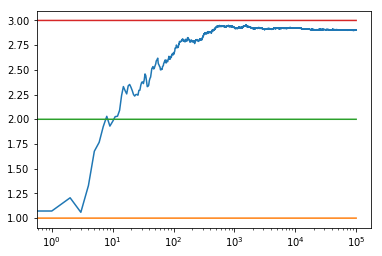

0.9748258491760086
2.017403908610338
3.001669637290702


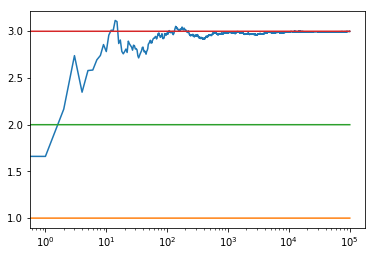

2.4587549287702815
2.9365474475735596
2.997741736189085


In [31]:
if __name__ == '__main__':
  c_1 = run_experiment_eps(1.0, 2.0, 3.0, 0.1, 100000)
  oiv = run_experiment(1.0, 2.0, 3.0, 100000)

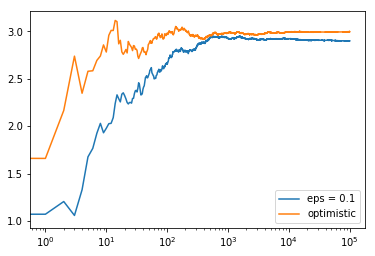

In [32]:
  # log scale plot
  plt.plot(c_1, label='eps = 0.1')
  plt.plot(oiv, label='optimistic')
  plt.legend()
  plt.xscale('log')
  plt.show()

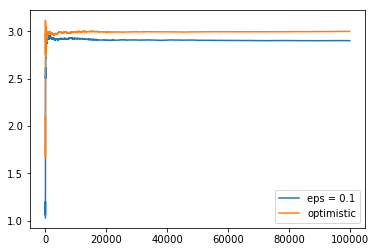

In [33]:
  # linear plot
  plt.plot(c_1, label='eps = 0.1')
  plt.plot(oiv, label='optimistic')
  plt.legend()
  plt.show()